In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('NFLX.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [4]:
df = df[['Date','Close']]
df

,Date,Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1009 non-null   object 
 1   Close   1009 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.9+ KB


In [6]:
import datetime

def str_to_datetime(s):
    split = s.split("-")
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

x = str_to_datetime('2018-02-05')
x

datetime.datetime(2018, 2, 5, 0, 0)

In [7]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\hussa\AppData\Local\Temp\ipykernel_13876\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2018-02-05
1      2018-02-06
2      2018-02-07
3      2018-02-08
4      2018-02-09
          ...    
1004   2022-01-31
1005   2022-02-01
1006   2022-02-02
1007   2022-02-03
1008   2022-02-04
Name: Date, Length: 1009, dtype: datetime64[ns]

In [8]:
df.index = df.pop('Date')
df

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


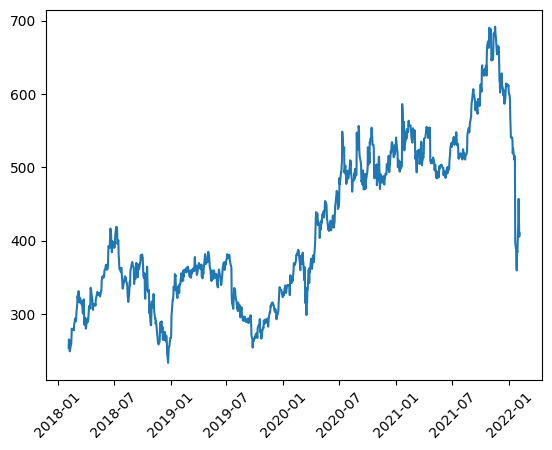

In [9]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])
plt.xticks(rotation=45) 
plt.show()

In [10]:
def window_data(data, n=3):
    windowed_data = pd.DataFrame()
    for i in range(n, 0, -1):
        windowed_data[f'Target-{i}'] = data['Close'].shift(i)
    windowed_data['Target'] = data['Close']
    return windowed_data.dropna()

In [11]:
df = window_data(df)

In [12]:
df.head()

,Target-3,Target-2,Target-1,Target
Date,,,,
2018-02-08,254.259995,265.720001,264.559998,250.100006
2018-02-09,265.720001,264.559998,250.100006,249.470001
2018-02-12,264.559998,250.100006,249.470001,257.950012
2018-02-13,250.100006,249.470001,257.950012,258.269989
2018-02-14,249.470001,257.950012,258.269989,266.000000


In [13]:
def windowed_df_to_date_X_y(windowed_dataframe):
    
    df_as_np = windowed_dataframe.to_numpy()
#    dates = df_as_np.index()

    middle_matrix = df_as_np[:, :-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -1]

    return X.astype(np.float32), Y.astype(np.float32)

dates = df.index

X, y = windowed_df_to_date_X_y(df)
dates.shape, X.shape, y.shape

((1006,), (1006, 3, 1), (1006,))

In [14]:
dates

DatetimeIndex(['2018-02-08', '2018-02-09', '2018-02-12', '2018-02-13',
               '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-20',
               '2018-02-21', '2018-02-22',
               ...
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-31', '2022-02-01', '2022-02-02',
               '2022-02-03', '2022-02-04'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [15]:
X.shape, y.shape

((1006, 3, 1), (1006,))

In [17]:
dates = np.array(dates)

In [18]:
print(dates)
print()
print(dates.shape)

['2018-02-08T00:00:00.000000000' '2018-02-09T00:00:00.000000000'
 '2018-02-12T00:00:00.000000000' ... '2022-02-02T00:00:00.000000000'
 '2022-02-03T00:00:00.000000000' '2022-02-04T00:00:00.000000000']

(1006,)


In [19]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

# Train Data
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

# Validation Data
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

# Test Data
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

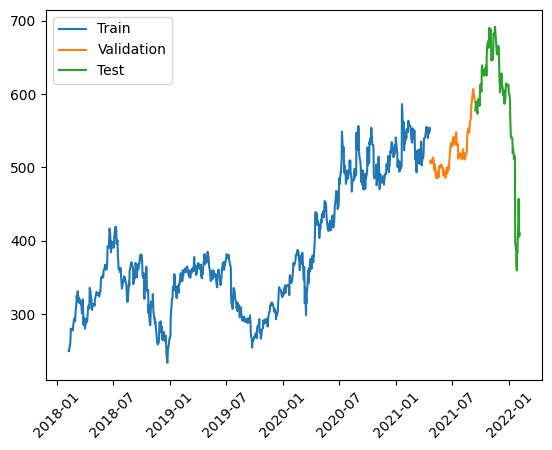

In [20]:
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.xticks(rotation=45)

plt.legend(['Train', 'Validation', 'Test'])
plt.show()

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM, Dense

In [24]:
model = Sequential()
model.add(LSTM(72, input_shape=(3,1)))

model.add(Dense(32,'relu'))

model.add(Dense(16,'relu'))

model.add(Dense(8,'relu'))

model.add(Dense(4,'relu'))

model.add(Dense(1,'linear'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 72)                21312     
                                                                 
 dense (Dense)               (None, 32)                2336      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 24353 (95.13 KB)
Trainable params: 24353 

In [25]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error'])

In [26]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=120)

Epoch 1/120


26/26 [==============================] - 11s 85ms/step - loss: 155269.1094 - mean_absolute_error: 384.5876 - val_loss: 272186.1250 - val_mean_absolute_error: 520.9076
Epoch 2/120
26/26 [==============================] - 0s 14ms/step - loss: 154921.4375 - mean_absolute_error: 384.1345 - val_loss: 271378.1875 - val_mean_absolute_error: 520.1315
Epoch 3/120
26/26 [==============================] - 0s 14ms/step - loss: 153770.3750 - mean_absolute_error: 382.6339 - val_loss: 268718.6250 - val_mean_absolute_error: 517.5683
Epoch 4/120
26/26 [==============================] - 0s 13ms/step - loss: 149990.2031 - mean_absolute_error: 377.6845 - val_loss: 260029.7812 - val_mean_absolute_error: 509.1053
Epoch 5/120
26/26 [==============================] - 0s 13ms/step - loss: 139749.9844 - mean_absolute_error: 363.8678 - val_loss: 237574.5938 - val_mean_absolute_error: 486.5515
Epoch 6/120
26/26 [==============================] - 0s 14ms/step - loss: 116945.7422 - mean_absolute_error

26/26 [==============================] - 2s 6ms/step


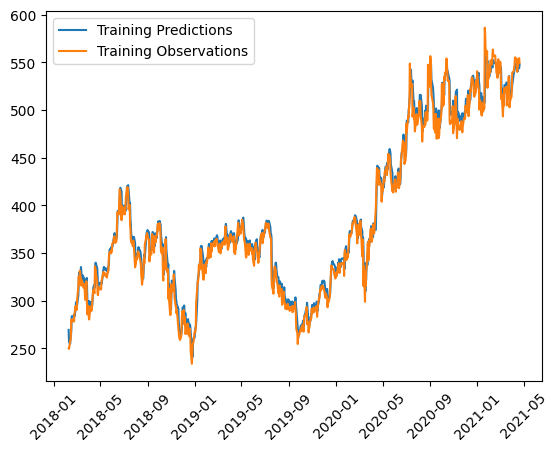

In [27]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)

plt.xticks(rotation=45)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

4/4 [==============================] - 0s 7ms/step


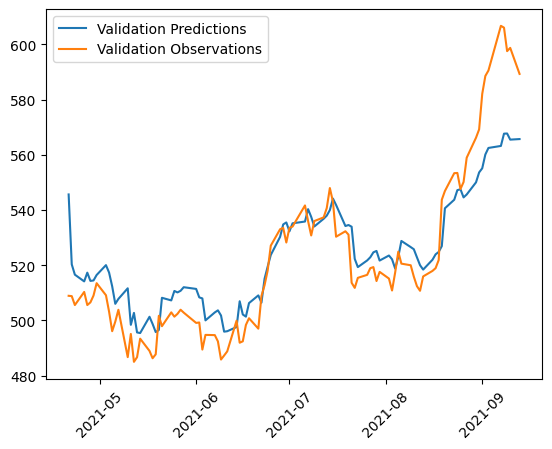

In [28]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)

plt.xticks(rotation=45)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

4/4 [==============================] - 0s 5ms/step


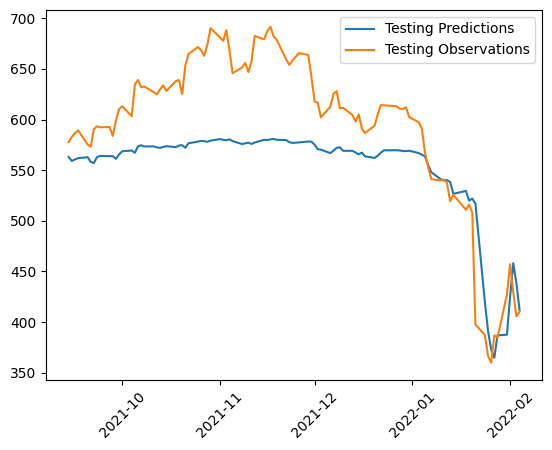

In [29]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)

plt.xticks(rotation=45)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

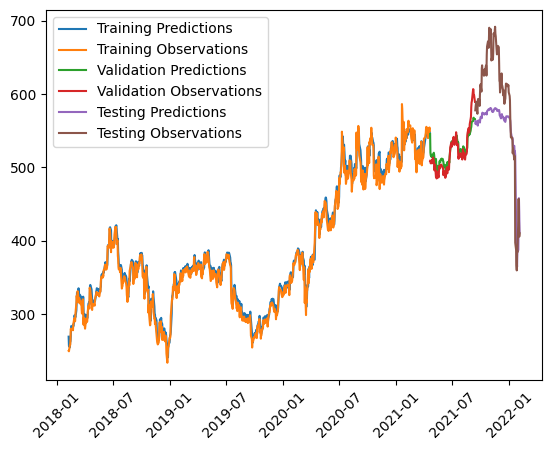

In [30]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)

plt.xticks(rotation=45)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])
plt.show()

Now we will try to predict the stock prices without the actual data, starting from the validation_data till the test_data and Evaluate the result

In [31]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
    last_window = deepcopy(X_train[-1])
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction

1/1 [==============================] - 0s 63ms/step


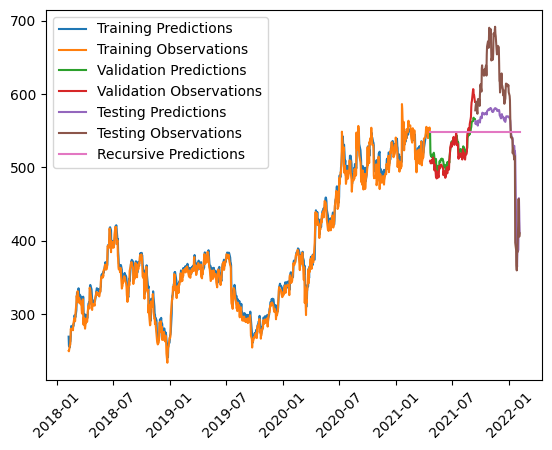

In [32]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)

plt.xticks(rotation=45)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])
plt.show()

The Pink Line indicates the prediction without any data, i.e. we are starting from the known date (last date of val_data) and trying to predict future stock prices from there with help of our LSTM Model